Verificando o Hardware

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
!/opt/bin/nvidia-smi
!nvcc --version

/bin/bash: /opt/bin/nvidia-smi: No such file or directory
nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2021 NVIDIA Corporation
Built on Sun_Feb_14_21:12:58_PST_2021
Cuda compilation tools, release 11.2, V11.2.152
Build cuda_11.2.r11.2/compiler.29618528_0


Instalando YOLO

In [ ]:
!git clone https://github.com/WongKinYiu/yolov7
%cd yolov7
!pip install -r requirements.txt

Cloning into 'yolov7'...
remote: Enumerating objects: 1094, done.
remote: Total 1094 (delta 0), reused 0 (delta 0), pack-reused 1094
Receiving objects: 100% (1094/1094), 69.89 MiB | 20.10 MiB/s, done.
Resolving deltas: 100% (516/516), done.
/content/yolov7/darknet/yolov7
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Montar o Drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=False)

Mounted at /content/gdrive


Instalar DarkNet

In [ ]:
!git clone https://github.com/AlexeyAB/darknet
%cd darknet
!make

Cloning into 'darknet'...
remote: Enumerating objects: 15502, done.
remote: Total 15502 (delta 0), reused 0 (delta 0), pack-reused 15502
Receiving objects: 100% (15502/15502), 14.14 MiB | 18.54 MiB/s, done.
Resolving deltas: 100% (10406/10406), done.
/content/yolov7/darknet/yolov7/darknet
mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -c ./src/image_opencv.cpp -o obj/image_opencv.o
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -c ./src/http_stream.cpp -o obj/http_stream.o
./src/http_stream.cpp: In member function ‘bool JSON_sender::write(const char*)’:
./src/http_stream.cpp:253:21: warning: unused variable ‘n’ [-Wunused-variable]
                 int n = _write(client, outputbuf, outlen);
                     ^
./src/http_stream.cpp: In function ‘void set_track_id(dete

Testando a instalação da darknet

In [ ]:
!./darknet

usage: ./darknet <function>


Pegando os pesos

In [ ]:
!wget https://pjreddie.com/media/files/yolo.weights

--2022-12-13 22:55:13--  https://pjreddie.com/media/files/yolo.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 203934260 (194M) [application/octet-stream]
Saving to: ‘yolo.weights’

yolo.weights        100%[===================>] 194.49M   108MB/s    in 1.8s    

2022-12-13 22:55:14 (108 MB/s) - ‘yolo.weights’ saved [203934260/203934260]



Rodando o detector para testar

In [ ]:
!./darknet detect cfg/yolo.cfg yolo.weights data/dog.jpg

 GPU isn't used 
 OpenCV isn't used - data augmentation will be slow 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 max                2x 2/ 2    416 x 416 x  32 ->  208 x 208 x  32 0.006 BF
   2 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   3 max                2x 2/ 2    208 x 208 x  64 ->  104 x 104 x  64 0.003 BF
   4 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   5 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   6 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   7 max                2x 2/ 2    104 x 104 x 128 ->   52 x  52 x 128 0.001 BF
   8 conv    256       3 x 3/ 1     52 x  52 x 128 ->   52 x  52 x 256 1.595 BF
   9 conv    128       1 x 1/ 1     52 x  52 x 256 ->   52 x  52 x 128 0.177 BF
  10 con

Importando mais dependências


In [ ]:
import glob, os

# Current directory
#current_dir = os.path.dirname(os.path.abspath(__file__))

#print(current_dir)

current_dir = '/content/drive/mydrive/dataset/'

# Percentage of images to be used for the test set
percentage_test = 20;

# Create and/or truncate train.txt and test.txt
file_train = open('train.txt', 'w')
file_test = open('test.txt', 'w')

# Populate train.txt and test.txt
counter = 1
index_test = round(100 / percentage_test)
for pathAndFilename in glob.iglob(os.path.join(current_dir, "*.jpg")):
    title, ext = os.path.splitext(os.path.basename(pathAndFilename))

    if counter == index_test:
        counter = 1
        file_test.write(current_dir + "/" + title + '.jpg' + "\n")
    else:
        file_train.write(current_dir + "/" + title + '.jpg' + "\n")
        counter = counter + 1


#Criando os arquivos de configuração

Criar os arquivos:
- obj.data

"classes= 1  
train  = train.txt  
valid  = test.txt  
names = obj.names  
backup = backup/"

- obj.names

"colocar o nome da classe"

Modificar o arquivo "tiny-yolo.cfg", no caminho: yolov7/darknet/cgf/

# Treinando o modelo

Baixando o arquivo pré treinado da rede

In [ ]:
!wget https://pjreddie.com/media/files/darknet19_448.conv.23

--2022-12-13 17:25:04--  https://pjreddie.com/media/files/darknet19_448.conv.23
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 79327120 (76M) [application/octet-stream]
Saving to: ‘darknet19_448.conv.23.1’

darknet19_448.conv. 100%[===================>]  75.65M  14.4MB/s    in 6.1s    

2022-12-13 17:25:11 (12.4 MB/s) - ‘darknet19_448.conv.23.1’ saved [79327120/79327120]



In [ ]:
#!ls
!./darknet detector train cfg/obj.data cfg/tiny-yolo.cfg darknet19_448.conv.23

 GPU isn't used 
 OpenCV isn't used - data augmentation will be slow 
tiny-yolo
mini_batch = 3, batch = 24, time_steps = 1, train = 1 
   layer   filters  size/strd(dil)      input                output
   0 conv     16       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  16 0.150 BF
   1 max                2x 2/ 2    416 x 416 x  16 ->  208 x 208 x  16 0.003 BF
   2 conv     32       3 x 3/ 1    208 x 208 x  16 ->  208 x 208 x  32 0.399 BF
   3 max                2x 2/ 2    208 x 208 x  32 ->  104 x 104 x  32 0.001 BF
   4 conv     64       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  64 0.399 BF
   5 max                2x 2/ 2    104 x 104 x  64 ->   52 x  52 x  64 0.001 BF
   6 conv    128       3 x 3/ 1     52 x  52 x  64 ->   52 x  52 x 128 0.399 BF
   7 max                2x 2/ 2     52 x  52 x 128 ->   26 x  26 x 128 0.000 BF
   8 conv    256       3 x 3/ 1     26 x  26 x 128 ->   26 x  26 x 256 0.399 BF
   9 max                2x 2/ 2     26 x  26 x 256 ->   13 x  13 x 256 0.000 

#Testando o modelo

Abrindo um arquivo

In [ ]:
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

 GPU isn't used 
 OpenCV isn't used - data augmentation will be slow 
mini_batch = 1, batch = 8, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     16       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  16 0.150 BF
   1 max                2x 2/ 2    416 x 416 x  16 ->  208 x 208 x  16 0.003 BF
   2 conv     32       3 x 3/ 1    208 x 208 x  16 ->  208 x 208 x  32 0.399 BF
   3 max                2x 2/ 2    208 x 208 x  32 ->  104 x 104 x  32 0.001 BF
   4 conv     64       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  64 0.399 BF
   5 max                2x 2/ 2    104 x 104 x  64 ->   52 x  52 x  64 0.001 BF
   6 conv    128       3 x 3/ 1     52 x  52 x  64 ->   52 x  52 x 128 0.399 BF
   7 max                2x 2/ 2     52 x  52 x 128 ->   26 x  26 x 128 0.000 BF
   8 conv    256       3 x 3/ 1     26 x  26 x 128 ->   26 x  26 x 256 0.399 BF
   9 max                2x 2/ 2     26 x  26 x 256 ->   13 x  13 x 256 0.000 BF
  10 con

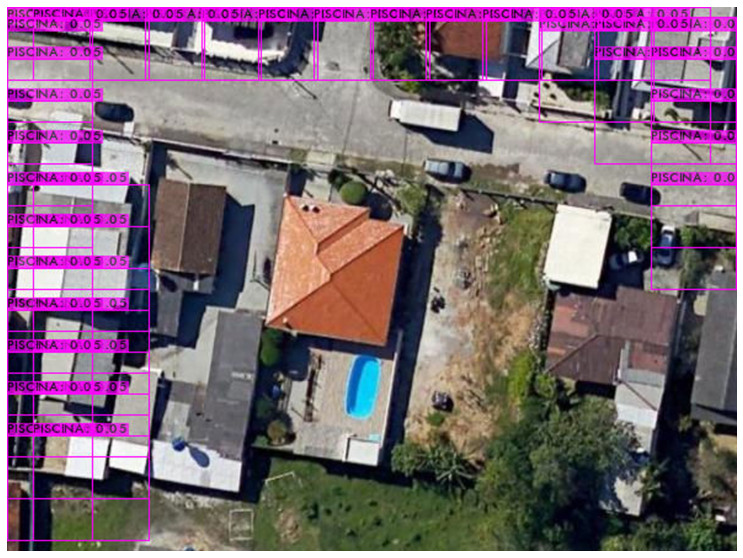

In [ ]:
!./darknet detector test cfg/obj.data cfg/tiny-yolo.cfg backup/tiny-yolo_last.weights /content/drive/MyDrive/dataset/piscina3.jpg -thresh 0.05
imShow('predictions.jpg')

#!./darknet detector test /data/kassa.data /cfg/yolov3_kassa.cfg /backup/tiny-yolo_last.weights /content/drive/MyDrive/exemplos/teste3.jpg
#!./darknet detector test cfg/coco.data cfg/yolov3.cfg yolo.weights data/dog.jpg
